In [33]:
%matplotlib notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing  import scale

## 通过Pandas导入数据

In [34]:
# 读取数据文件

df = pd.read_csv("C:/Users/92149/Desktop/data/boston.csv",header = 0)

# 显示数据摘要描述信息

print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [35]:
# 显示所有数据

print(df)

        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

## 载入本示例所需数据

In [36]:
# 获取数据集的值

ds = df.values # df.values以np.array形式返回数据集的值

print(ds.shape)
print(ds)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


#### 划分特征数据和标签数据

In [37]:
# x_data 为前12列特征数据
x_data = ds[:,:12]

# y_data 为最后1列标签数据
y_data = ds[:,12]

#### 特征数据归一化

In [38]:
# 对特征数据[0`11]列做（0-1）归一化
for i in range(12):
    x_data[:,i] = ((x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min()))

In [39]:
print(x_data)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.08015267e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 1.04961832e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.64122137e-01
  8.93617021e-01 1.69701987e-01]]


### 划分数据集:训练集，验证集和测试集

In [40]:
train_num = 300 # 训练集的数目
valid_num = 100 # 验证集的数目
test_num = len(x_data) - train_num - valid_num  # 测试集的数目

# 训练集划分
x_train = x_data[:train_num]
y_train = y_data[:train_num]

# 验证集划分
x_valid = x_data[train_num:train_num + valid_num]
y_valid = y_data[train_num:train_num + valid_num]

# 测试机划分
x_test = x_data[train_num + valid_num:train_num + valid_num + test_num]
y_test = y_data[train_num + valid_num:train_num + valid_num + test_num]

## 转换为tf.float32数据类型，后面求损失时要和变量W执行tf.matmul操作

In [41]:
x_train = tf.cast(x_train, dtype=tf.float32)
x_valid = tf.cast(x_valid, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)

## 构建模型

### 定义模型

#### 多元线性回归函数仍然是个简单的线性函数，其基本形式还是y=w*x+b,只是此处w和b不再是一个标量，形状会不同.根据模型定义，执行的是矩阵叉乘

In [42]:
def model(x,w,b):
    return tf.matmul(x,w) + b

### 创建变量

In [43]:
W = tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
B = tf.Variable(tf.zeros(1),dtype=tf.float32)

In [44]:
print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.68268394],
       [ 0.46075988],
       [ 1.6881623 ],
       [-0.5396729 ],
       [-0.19736542],
       [ 0.2791377 ],
       [ 2.2508974 ],
       [-0.5394713 ],
       [ 1.3117176 ],
       [ 0.22605142],
       [ 2.31412   ],
       [-1.527099  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 训练模型

### 设置训练参数

In [57]:
training_epochs = 1000 # 迭代次数
learning_rate = 0.001 #学习率
batch_size = 10 # 批量训练一次的样本数

### 定义均方差损失函数

In [58]:
# 采用均方差作为损失函数

def loss(x,y,w,b):
    err = model(x,w,b) - y
    squared_err = tf.square(err)
    return tf.reduce_mean(squared_err)

### 定义梯度计算函数

In [59]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])

In [60]:
optimizer = tf.keras.optimizers.SGD(learning_rate)   #创建优化器，指定学习率

### 迭代训练

In [62]:
loss_list_train = []   # 用于保存训练集loss值的列表
loss_list_valid = []   # 用于保存验证集loss值的列表
total_step = int(train_num/batch_size)

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size:(step+1)*batch_size,:]
        ys = y_train[step*batch_size:(step+1)*batch_size]
        grads = grad(xs,ys,W,B)   #计算梯度
        optimizer.apply_gradients(zip(grads,[W,B]))
        
    loss_train = loss(x_train,y_train,W,B).numpy()   #计算当前轮训练损失
    loss_valid = loss(x_valid,y_valid,W,B).numpy()   #计算当前轮验证损失
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d},train_loss={:.4f},vaild_loss={:4f}".format((epoch+1),loss_train,loss_valid))

epoch=  1,train_loss=101.1773,vaild_loss=105.283989
epoch=  2,train_loss=101.1798,vaild_loss=105.280411
epoch=  3,train_loss=101.1823,vaild_loss=105.276878
epoch=  4,train_loss=101.1848,vaild_loss=105.273224
epoch=  5,train_loss=101.1873,vaild_loss=105.269623
epoch=  6,train_loss=101.1897,vaild_loss=105.266022
epoch=  7,train_loss=101.1922,vaild_loss=105.262512
epoch=  8,train_loss=101.1947,vaild_loss=105.258888
epoch=  9,train_loss=101.1971,vaild_loss=105.255325
epoch= 10,train_loss=101.1996,vaild_loss=105.251747
epoch= 11,train_loss=101.2020,vaild_loss=105.248222
epoch= 12,train_loss=101.2045,vaild_loss=105.244659
epoch= 13,train_loss=101.2069,vaild_loss=105.241173
epoch= 14,train_loss=101.2093,vaild_loss=105.237625
epoch= 15,train_loss=101.2118,vaild_loss=105.234116
epoch= 16,train_loss=101.2142,vaild_loss=105.230522
epoch= 17,train_loss=101.2166,vaild_loss=105.226990
epoch= 18,train_loss=101.2190,vaild_loss=105.223427
epoch= 19,train_loss=101.2214,vaild_loss=105.219910
epoch= 20,tr

<IPython.core.display.Javascript object>


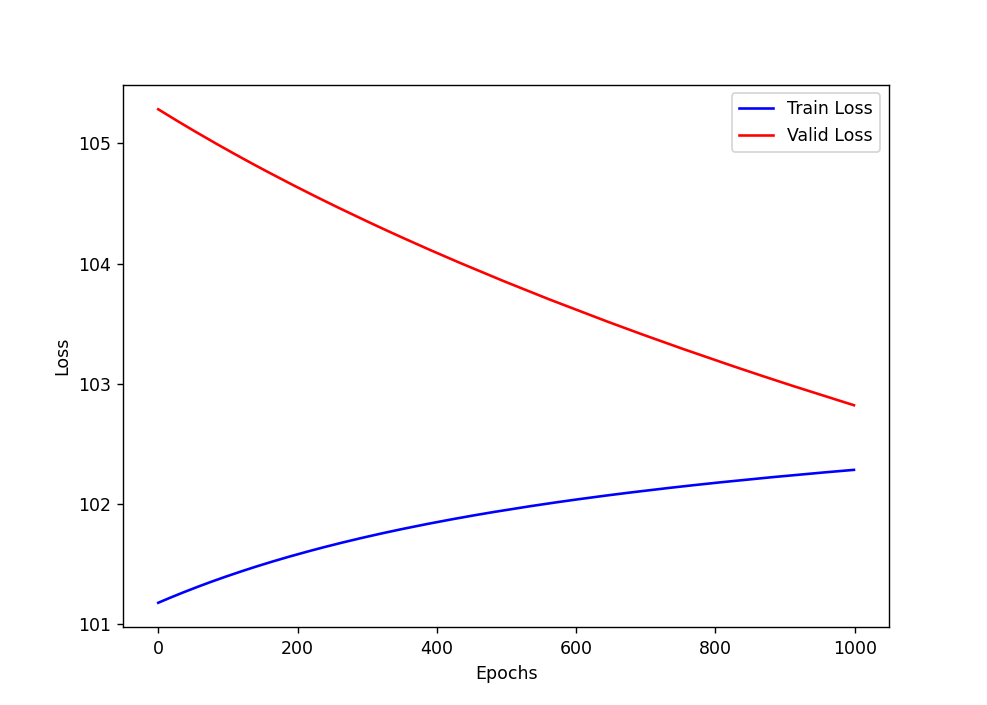

In [64]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label = "Valid Loss")
plt.legend(loc=1)

#### 查看测试集的损失

In [65]:
print("Test_loss: {:.4f}".format(loss(x_test,y_test,W,B).numpy()))

Test_loss: 57.0887


#### 应用模型

In [72]:
test_house_id = np.random.randint(0,test_num)
y = y_test[test_house_id]
y_pred = model(x_test,W,B)[test_house_id]
y_predit = tf.reshape(y_pred,()).numpy()
print("House id",test_house_id,"Actual",y,"Predicted",y_predit)

House id 12 Actual 17.9 Predicted 15.567968
